Using Sample bank Loann Data

Import Nesssary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

File Upload

In [2]:
from google.colab import files
uploaded = files.upload()

Saving samplebankloandata.xlsx to samplebankloandata.xlsx


In [3]:
df = pd.read_excel('/content/samplebankloandata.xlsx')
print(df.head())

        id  year    issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011 2011-01-12  1012015            10.0           RENT   
1  1077430  2011 2011-01-12  1042013             0.5           RENT   
2  1077175  2011 2011-01-12  1062014            10.0           RENT   
3  1076863  2011 2011-01-12  1012015            10.0           RENT   
4  1075358  2011 2011-01-12  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  ...  \
0                   1             Low       24000           1  ...   
1                   1             Low       30000           1  ...   
2                   1             Low       12252           1  ...   
3                   1             Low       49200           1  ...   
4                   1             Low       80000           1  ...   

   loan_condition_cat interest_rate  grade grade_cat    dti   total_pymnt  \
0                   0         10.65      B         2  27.65   5861.071414  

Print head and tail of the data(if more data then include number inside the (20))

In [4]:
print(df.head())
print(df.tail())

        id  year    issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011 2011-01-12  1012015            10.0           RENT   
1  1077430  2011 2011-01-12  1042013             0.5           RENT   
2  1077175  2011 2011-01-12  1062014            10.0           RENT   
3  1076863  2011 2011-01-12  1012015            10.0           RENT   
4  1075358  2011 2011-01-12  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  ...  \
0                   1             Low       24000           1  ...   
1                   1             Low       30000           1  ...   
2                   1             Low       12252           1  ...   
3                   1             Low       49200           1  ...   
4                   1             Low       80000           1  ...   

   loan_condition_cat interest_rate  grade grade_cat    dti   total_pymnt  \
0                   0         10.65      B         2  27.65   5861.071414  

Datatypes

In [5]:
print(df.dtypes)

id                               int64
year                             int64
issue_d                 datetime64[ns]
final_d                          int64
emp_length_int                 float64
home_ownership                  object
home_ownership_cat               int64
income_category                 object
annual_inc                       int64
income_cat                       int64
loan_amount                      int64
term                            object
term_cat                         int64
application_type                object
application_type_cat             int64
purpose                         object
purpose_cat                      int64
interest_payments               object
interest_payment_cat             int64
loan_condition                  object
loan_condition_cat               int64
interest_rate                  float64
grade                           object
grade_cat                        int64
dti                            float64
total_pymnt              

Isnull

In [6]:
 print(df.isnull().sum())

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64


Describe

In [7]:
print(df.describe())

                 id          year                        issue_d  \
count  9.590200e+04  95902.000000                          95902   
mean   1.147685e+06   2011.215606  2011-03-27 01:18:42.621008896   
min    5.473400e+04   2007.000000            2007-01-06 00:00:00   
25%    6.907415e+05   2011.000000            2011-01-03 00:00:00   
50%    1.150927e+06   2012.000000            2012-01-03 00:00:00   
75%    1.486514e+06   2012.000000            2012-01-09 00:00:00   
max    2.844673e+06   2012.000000            2012-01-12 00:00:00   
std    5.318572e+05      1.089114                            NaN   

            final_d  emp_length_int  home_ownership_cat    annual_inc  \
count  9.590200e+04    95902.000000        95902.000000  9.590200e+04   
mean   1.066972e+06        5.460427            2.001147  6.946160e+04   
min    1.012008e+06        0.500000            1.000000  1.896000e+03   
25%    1.032015e+06        2.000000            1.000000  4.200000e+04   
50%    1.072012e+06   

DISTRIBUTION OF PROJECT COSTS

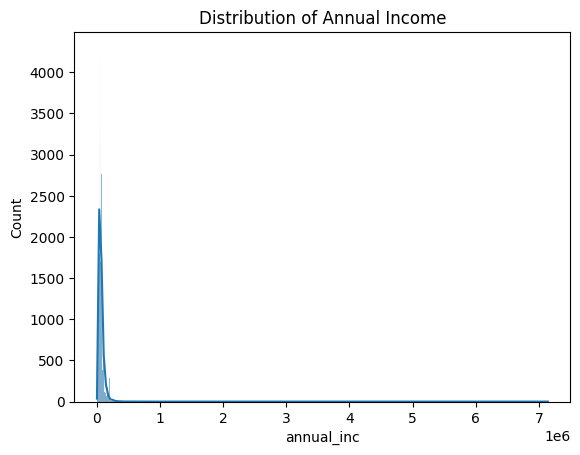

In [8]:
sns.histplot(data=df, x='annual_inc', kde=True)
plt.title('Distribution of Annual Income')
plt.show()

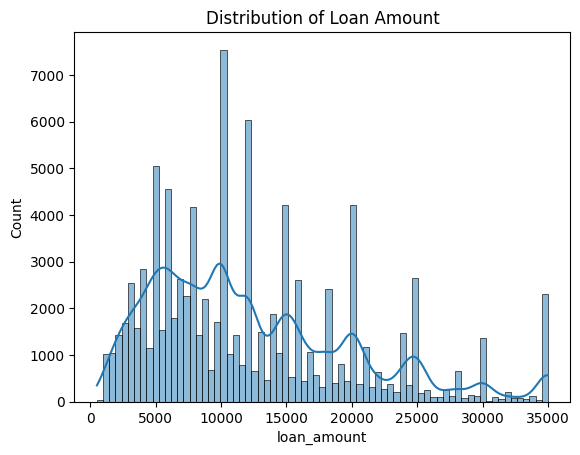

In [9]:
sns.histplot(data=df, x='loan_amount', kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

Home Ownership count

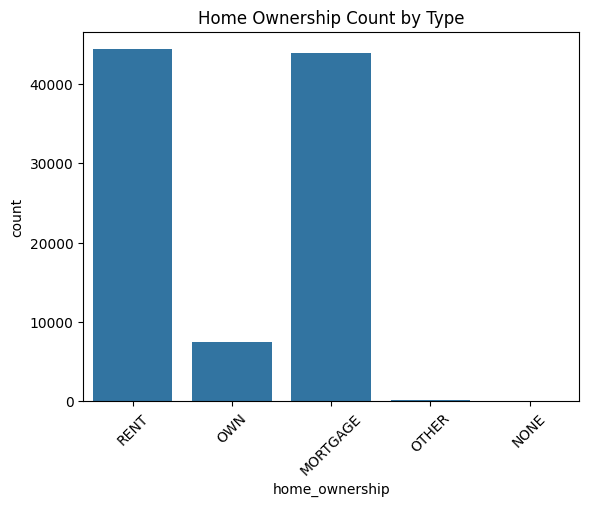

In [10]:
sns.countplot(data=df, x='home_ownership')
plt.xticks(rotation=45)
plt.title('Home Ownership Count by Type')
plt.show()

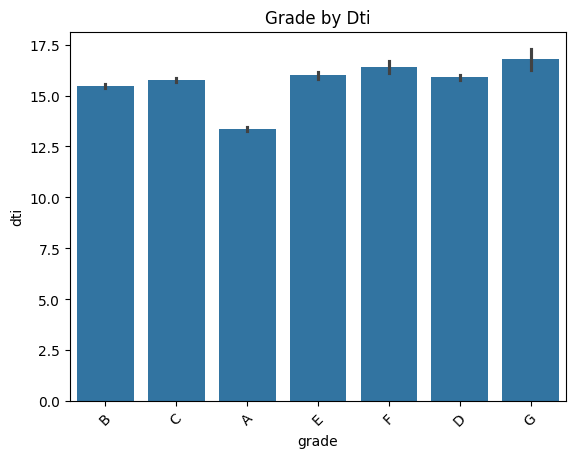

In [11]:
sns.barplot(data=df, x='grade', y='dti', estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Grade by Dti')
plt.show()

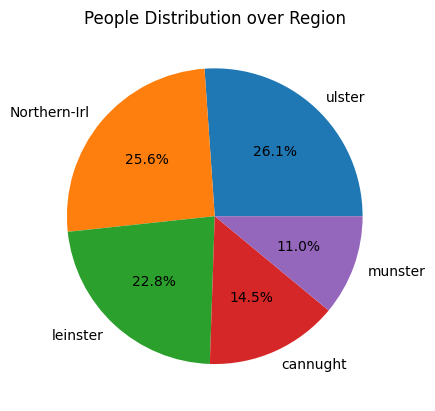

In [12]:
plt.pie(df['region'].value_counts(), labels=df['region'].value_counts().index, autopct='%1.1f%%')
plt.title('People Distribution over Region')
plt.show()

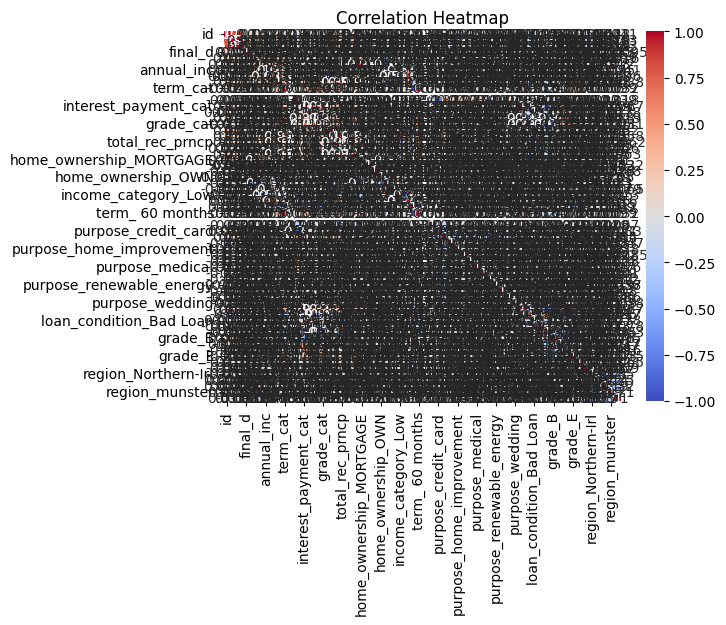

In [13]:
encoded_df = pd.get_dummies(df)

# Now, compute the correlation matrix
corr = encoded_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

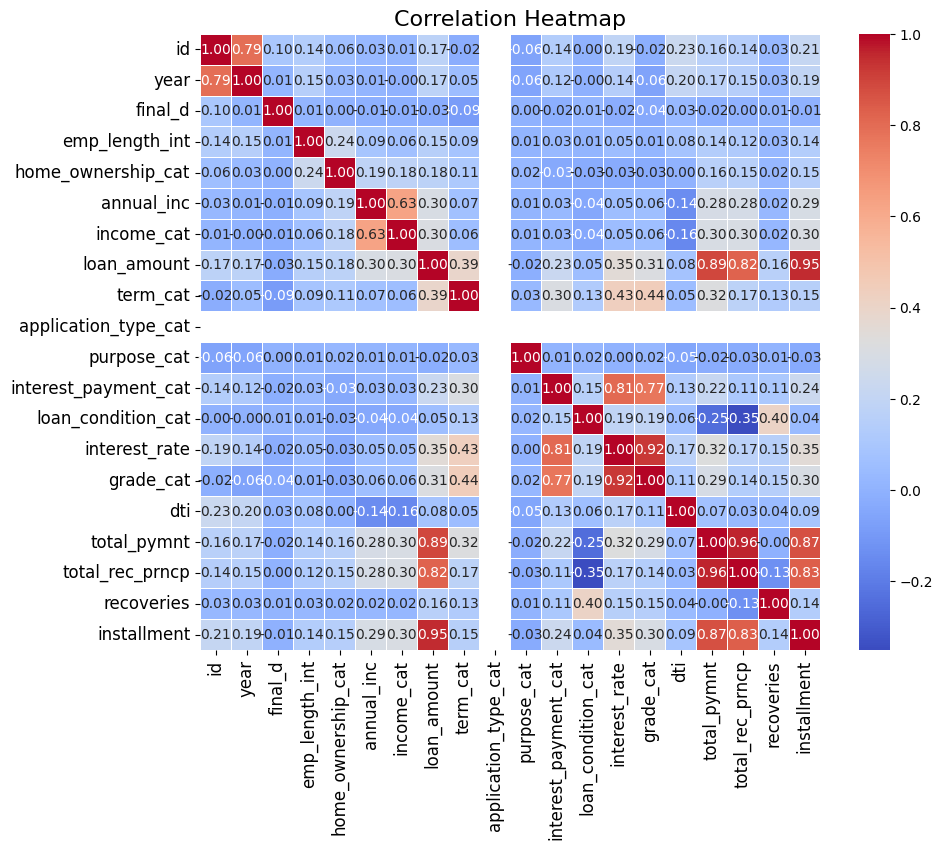

In [14]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

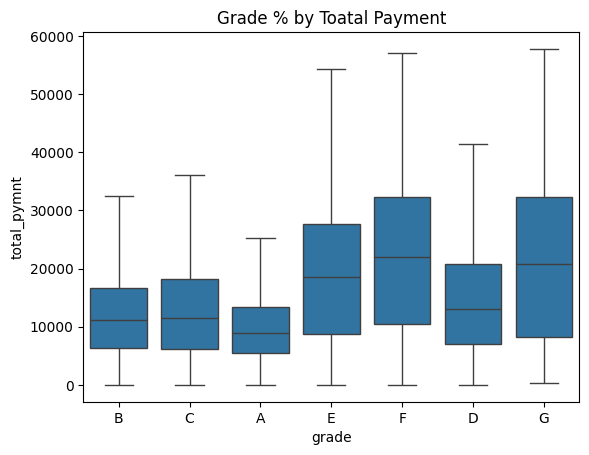

In [15]:
sns.boxplot(data=df, x='grade', y='total_pymnt', showfliers=False)
plt.title('Grade % by Toatal Payment')
plt.show()

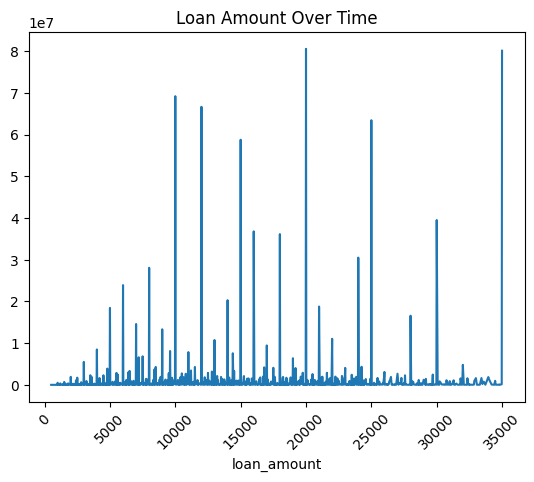

In [16]:
df.groupby('loan_amount')['loan_amount'].sum().plot()
plt.title('Loan Amount Over Time')
plt.xticks(rotation=45)
plt.show()

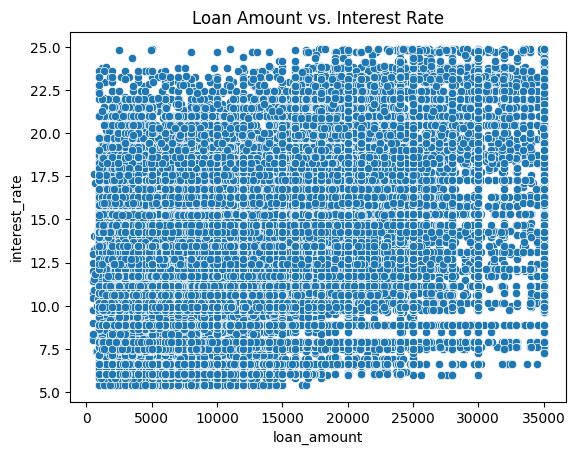

In [17]:
sns.scatterplot(data=df, x='loan_amount', y='interest_rate')
plt.title('Loan Amount vs. Interest Rate')
plt.show()

In [18]:
import plotly.express as px

fig = px.scatter_3d(df, x='annual_inc', y='region', z='installment',
                  color='purpose')
fig.update_layout(scene = dict(
                    xaxis = dict(title  = 'annual_inc'),
                    yaxis = dict(title  = 'region'),
                    zaxis = dict(title  = 'installment')))
fig.show()